***GO_STP_71: SURAJ SANJEEV PAWAR***

**Goeduhub Technologies**<br>
***https://www.goeduhub.com/***

**Assignment/Task 11**<br>
Predict Loan Eligibility for Dream Housing Finance company<br>
***Online Summer training on Machine Learning & Data Science With Python***

**Problem Statement**

**About Company**<br>
*Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.*

**Problem**<br>
*Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.*

In [6]:
from google.colab import files
from IPython import display
uploaded=files.upload()

Saving loadprediction.png to loadprediction.png


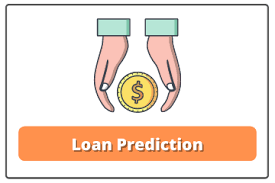

In [16]:
display.Image("loadprediction.png",height="500",width="700")

###***Importing  required libraries***

In [1]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path='drive/My Drive/'

***Load the Load_Data and read***

In [5]:
import pandas as pd
df=pd.read_csv(path+"/Loan_dataset.csv")

***to fine the type of the dataset***

In [6]:
#to find the type of dataset
print(type(df))

<class 'pandas.core.frame.DataFrame'>


***shape of the given dataset***

In [7]:
#to find the shape of dataframe
print(df.shape)

(614, 13)


***Get the first five values form dataset***

In [8]:
#get the first top 5 values
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


***Get the last five values form dataset***

In [9]:
#get the bottom 5 values
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


***find the correlation***

In [10]:
#to find the correlation in dataframe
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


***to find the columns name in dataset***

In [11]:
#to find the name of columns in dataframe
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

***finding the min value in the dataset***

In [12]:
#to find the min on each column of the dataset
df.min()

Loan_ID              LP001002
Education            Graduate
ApplicantIncome           150
CoapplicantIncome           0
LoanAmount                  9
Loan_Amount_Term           12
Credit_History              0
Property_Area           Rural
Loan_Status                 N
dtype: object

***finding the max value in the dataset***

In [13]:
#to find the max on each column of the dataset
df.max()

Loan_ID                  LP002990
Education            Not Graduate
ApplicantIncome             81000
CoapplicantIncome           41667
LoanAmount                    700
Loan_Amount_Term              480
Credit_History                  1
Property_Area               Urban
Loan_Status                     Y
dtype: object

***find any unique or dublicate value in dataset***

In [14]:
#to get info about the unique values in dataframe
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

***slicing using iloc for integer number only***

In [15]:
#to get data using slicing using iloc 
df.iloc[2:8]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N


***Statistical Properties of Dataset***

In [16]:
#to summarize the statistical details of the dataframe
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


***to summarize the dataset***

In [17]:
#to summarize the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


***to return the null value in dataset***

In [18]:
#to return the null values in the dataframe
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Number of people who take a loan group by gender :
Male      489
Female    112
Name: Gender, dtype: int64


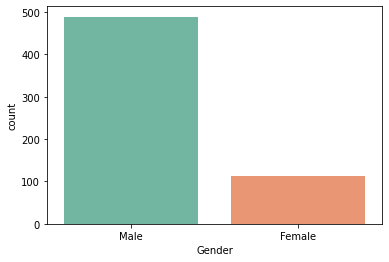

In [19]:
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data=df, palette = 'Set2')

Yes    398
No     213
Name: Married, dtype: int64


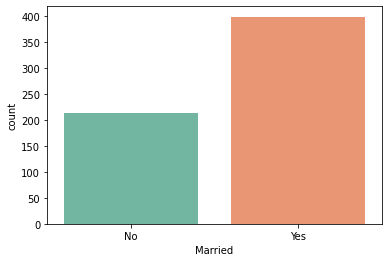

In [20]:
print(df['Married'].value_counts())
sns.countplot(x='Married', data=df, palette = 'Set2')

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


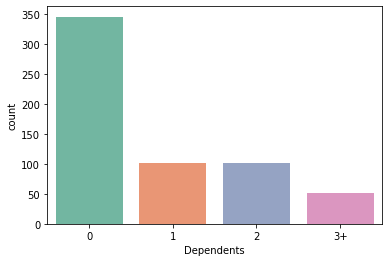

In [21]:
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents', data=df, palette = 'Set2')

No     500
Yes     82
Name: Self_Employed, dtype: int64


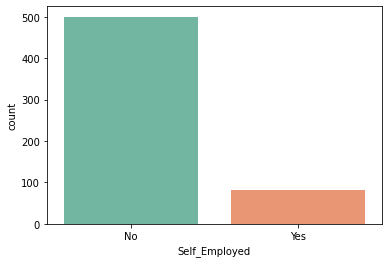

In [22]:
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed', data=df, palette = 'Set2')

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


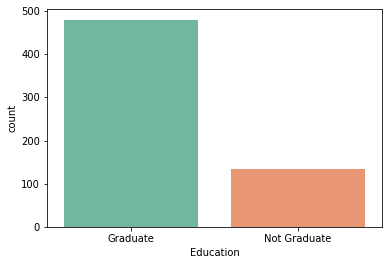

In [23]:
print(df['Education'].value_counts())
sns.countplot(x='Education', data=df, palette = 'Set2')

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


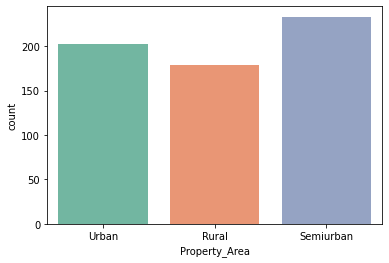

In [24]:
print(df['Property_Area'].value_counts())
sns.countplot(x='Property_Area', data=df, palette = 'Set2')

1.0    475
0.0     89
Name: Credit_History, dtype: int64


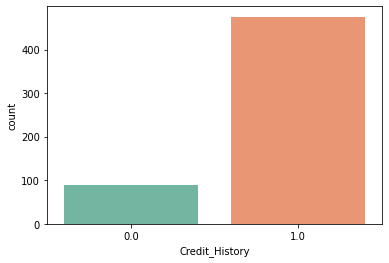

In [25]:
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History', data=df, palette = 'Set2')

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


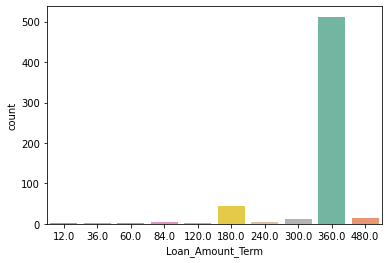

In [26]:
print(df['Loan_Amount_Term'].value_counts())
sns.countplot(x='Loan_Amount_Term', data=df, palette = 'Set2')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


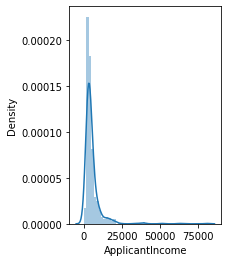

In [27]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['ApplicantIncome']).plot(figsize=(20,15))
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


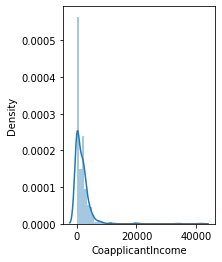

In [28]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['CoapplicantIncome']).plot(figsize=(20,15))
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


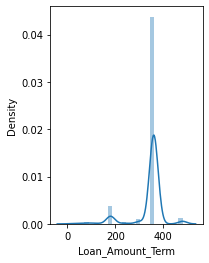

In [29]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['Loan_Amount_Term']).plot(figsize=(20,15))
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


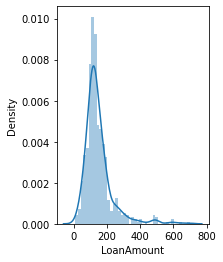

In [30]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['LoanAmount']).plot(figsize=(20,15))
plt.show();

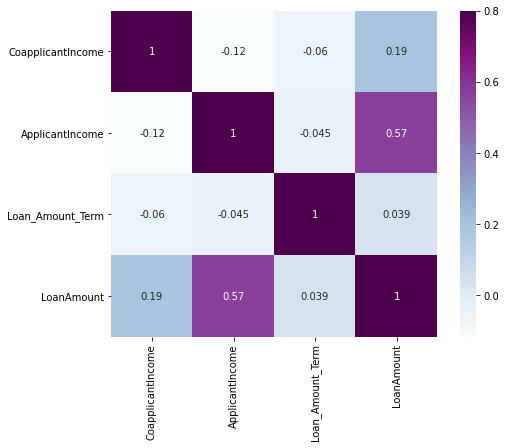

In [31]:
#Looking at a correlation among all numeric variables
numeric_features=['CoapplicantIncome','ApplicantIncome','Loan_Amount_Term','LoanAmount']
corr_matrix = df[numeric_features].corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, vmax=.8, annot=True, square=True, cmap="BuPu");

***This is all about the visualizations***